In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [2]:
# pandas
import pandas as pd
def df2np(df, model):
    df = df.loc[df['Model'] == model, 'SSIM']
    return df.to_numpy().T

# Load Knee results
knee_df = pd.read_excel('./data/Knee_results.xlsx')

knee_vit_008M10 = df2np(knee_df, 'ViT-8M/10')
knee_vit_032M10 = df2np(knee_df, 'ViT-32M/10')


knee_vit_008M16 = df2np(knee_df, 'ViT-8M/16')
knee_vit_032M16 = df2np(knee_df, 'ViT-32M/16')


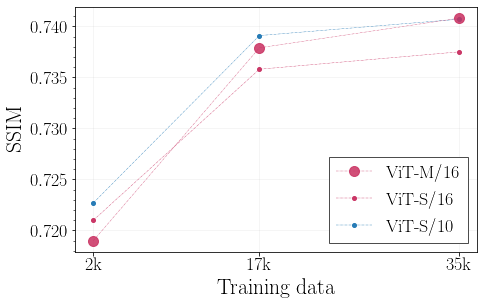

In [3]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots(1, 1, figsize=(w, h))

""" Model styles """
vits = ViT('s', useline=True)
vitm = ViT('m', useline=True)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=False)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

""" Plot Knee """
knee_train_data = [2, 17, 35]
ax.plot(knee_train_data, knee_vit_032M16, vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color='#c93061', label=vitm.label+'/16', zorder=4)
ax.plot(knee_train_data, knee_vit_008M16, vits.marker, markersize=vits.ms, alpha=vits.oc, color='#c93061', label=vits.label+'/16', zorder=2)
ax.plot(knee_train_data, knee_vit_008M10, vits.marker, markersize=vits.ms, alpha=vits.oc, color=vits.color, label=vits.label+'/10', zorder=2)
ax.set_title('')
ax.set_xticks(knee_train_data)
ax.set_xticklabels(['2k', '17k', '35k'])
ax.tick_params(axis='x', which='minor', bottom=False)
# ax.yaxis.set_ticks(np.arange(0.72, 0.745, 0.005))
ax.legend()

# Labels
ax.set_xlabel('Training data', y=-0.02)
ax.set_ylabel('SSIM', x=0.055)

## Save
fig.savefig('./plots/scaling_p16.pdf', format="pdf", bbox_inches = 'tight')